In [5]:
# Import modules
import numpy as np

# Import sphere function as objective function
from pyswarms.utils.functions.single_obj import sphere as f

# Import backend modules
import pyswarms.backend as P
from pyswarms.backend.topology import Star

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from scipy.optimize import rosen

In [28]:
import matplotlib.pyplot as plt

In [78]:
my_topology = Star() # The Topology Class
my_options = {'c1': 0.6, 'c2': 0.3, 'w': 0.4} # arbitrarily set
my_swarm = P.create_swarm(n_particles=100, dimensions=2, options=my_options) # The Swarm Class

print('The following are the attributes of our swarm: {}'.format(my_swarm.__dict__.keys()))

The following are the attributes of our swarm: dict_keys(['position', 'velocity', 'n_particles', 'dimensions', 'options', 'pbest_pos', 'best_pos', 'pbest_cost', 'best_cost', 'current_cost'])


Iteration: 1 | my_swarm.best_cost: 0.0748


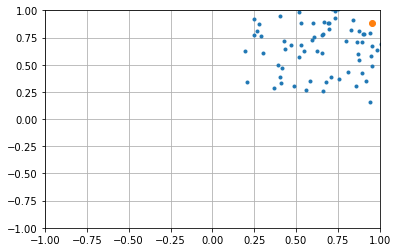

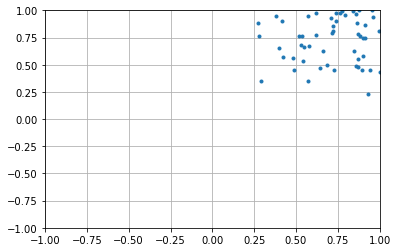

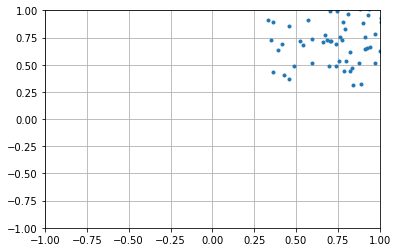

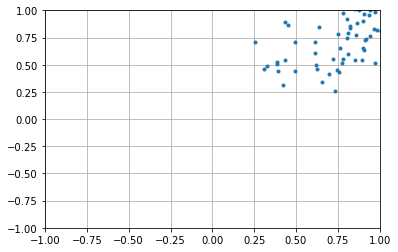

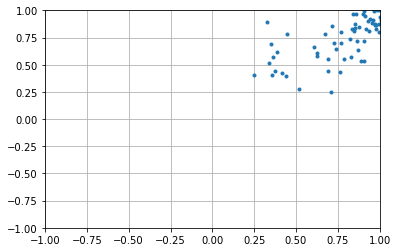

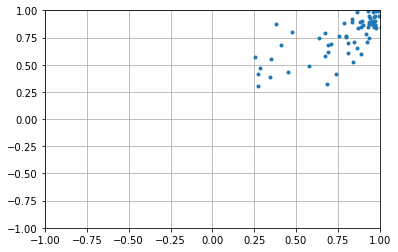

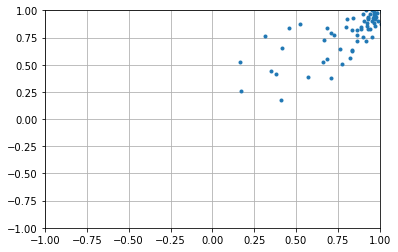

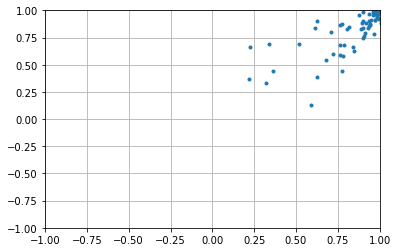

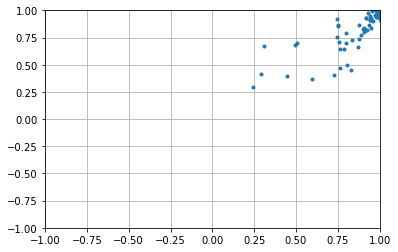

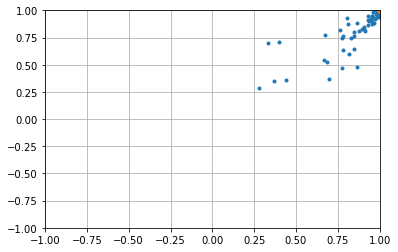

The best cost found by our swarm is: 0.0001
The best position found by our swarm is: [1.00154074 1.0019052 ]


In [79]:
iterations = 10 # Set 100 iterations
for i in range(iterations):
    # Part 1: Update personal best
    my_swarm.current_cost = rosen(my_swarm.position.T) # f(my_swarm.position) # Compute current cost
    my_swarm.pbest_cost = rosen(my_swarm.pbest_pos.T) # f(my_swarm.pbest_pos)  # Compute personal best pos
    my_swarm.pbest_pos, my_swarm.pbest_cost = P.compute_pbest(my_swarm) # Update and store

    # Part 2: Update global best
    # Note that gbest computation is dependent on your topology
    if np.min(my_swarm.pbest_cost) < my_swarm.best_cost:
        my_swarm.best_pos, my_swarm.best_cost = my_topology.compute_gbest(my_swarm)

    # Let's print our output
    if i%20==0:
        print('Iteration: {} | my_swarm.best_cost: {:.4f}'.format(i+1, my_swarm.best_cost))

    # Part 3: Update position and velocity matrices
    # Note that position and velocity updates are dependent on your topology
    my_swarm.velocity = my_topology.compute_velocity(my_swarm)
    my_swarm.position = my_topology.compute_position(my_swarm)
    
    plt.plot(*my_swarm.position.T, '.')
    plt.plot(*my_swarm.best_pos.T, 'o')
    #plt.axis('equal')
    plt.axis([-1, 1, -1, 1])
    plt.grid()
    plt.show()

print('The best cost found by our swarm is: {:.4f}'.format(my_swarm.best_cost))
print('The best position found by our swarm is: {}'.format(my_swarm.best_pos))

array([1.00318539, 1.66968293, 1.11923788, 6.7498408 , 0.96371948,
       2.16470355, 2.01876704, 0.89477374, 0.90673585, 0.98742829,
       1.04302639, 0.95771958, 0.97819958, 0.8490941 , 1.31211455,
       1.18763868, 1.84758032, 1.11333493, 1.17263904, 1.1243421 ,
       0.89002701, 1.15618873, 0.96283424, 0.80241184, 3.18001545,
       0.74046519, 2.46221786, 0.72580091, 0.7290632 , 1.16237092,
       1.07582521, 1.30636994, 2.22158774, 1.01640034, 1.15582063,
       2.42318442, 0.8342137 , 1.73452979, 0.97044152, 0.95200764,
       2.46939472, 1.21177241, 1.4233344 , 0.93448986, 0.83529968,
       1.75479343, 1.01051914, 0.80405328, 0.76225649, 1.10418774,
       1.1531636 , 0.90907784, 1.03523567, 1.04188042, 0.98237171,
       1.39787731, 1.09480867, 0.9936716 , 0.92315396, 1.10184872,
       0.97282134, 0.95830606, 1.11192775, 3.67317978, 0.88854011,
       0.92474847, 3.94948365, 1.13918784, 1.67273021, 1.78277982,
       1.04530654, 0.96131937, 1.05687745, 1.36858943, 0.91456

In [27]:
my_swarm.pbest_cost

array([0.362395  , 0.94066348, 0.27991878, 0.18340038, 0.3283324 ,
       0.71665516, 0.06347422, 0.87351012, 0.80348864, 1.21295829])

In [26]:
f(np.array([[0, 1, 2]]))

array([5.])